<a href="https://colab.research.google.com/github/VasireddyNandini/predictive-analysis/blob/opt_price_pred/opt_price_prod_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

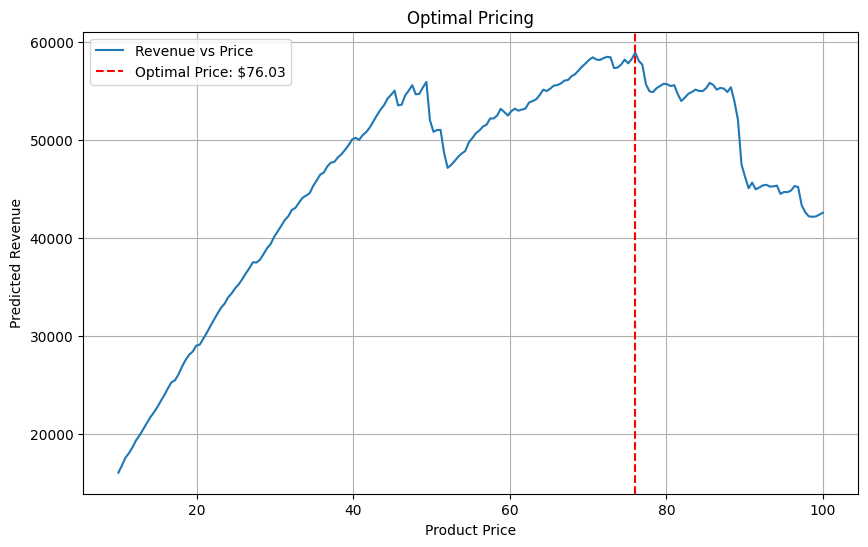


🔍 Optimal Price: $76.03
💰 Expected Revenue: $58885.74


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Simulate product pricing data
np.random.seed(42)
n_samples = 500

data = pd.DataFrame({
    'product_price': np.random.uniform(10, 100, n_samples),
    'competitor_price': np.random.uniform(10, 100, n_samples),
    'month': np.random.randint(1, 13, n_samples)
})

# Step 2: Simulate seasonality and demand behavior
def simulate_demand(row):
    base = 1000
    price_effect = -8 * (row['product_price'] - 50)  # price elasticity
    competitor_effect = 5 * (row['competitor_price'] - row['product_price'])
    seasonal_effect = 100 * np.sin(2 * np.pi * row['month'] / 12)  # seasonal demand
    noise = np.random.normal(0, 50)
    return base + price_effect + competitor_effect + seasonal_effect + noise

data['demand'] = data.apply(simulate_demand, axis=1)
data['revenue'] = data['product_price'] * data['demand']

# Step 3: Train model to predict demand
features = ['product_price', 'competitor_price', 'month']
X = data[features]
y = data['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict revenue for a range of prices
def predict_optimal_price(competitor_price, month):
    prices = np.linspace(10, 100, 200)
    test_data = pd.DataFrame({
        'product_price': prices,
        'competitor_price': competitor_price,
        'month': month
    })
    predicted_demand = model.predict(test_data)
    revenue = prices * predicted_demand
    optimal_index = np.argmax(revenue)
    return prices[optimal_index], revenue[optimal_index], prices, revenue

# Example use: Find best price in March (month=3), competitor price = 55
opt_price, opt_revenue, price_range, revenue_range = predict_optimal_price(competitor_price=55, month=3)

# Step 5: Plot
plt.figure(figsize=(10,6))
plt.plot(price_range, revenue_range, label='Revenue vs Price')
plt.axvline(opt_price, color='red', linestyle='--', label=f'Optimal Price: ${opt_price:.2f}')
plt.xlabel('Product Price')
plt.ylabel('Predicted Revenue')
plt.title('Optimal Pricing')
plt.legend()
plt.grid(True)
plt.show()

print(f"\n🔍 Optimal Price: ${opt_price:.2f}")
print(f"💰 Expected Revenue: ${opt_revenue:.2f}")

